In [29]:
import nltk
import seaborn as sns
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv('yelp.csv')

In [4]:
data.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [13]:
data.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


In [8]:
data['text_length'] =data['text'].apply(len)

In [9]:
#sns.pairplot(data)

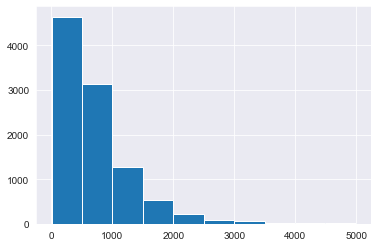

In [11]:
sns.set_style('darkgrid')
data.text_length.hist()

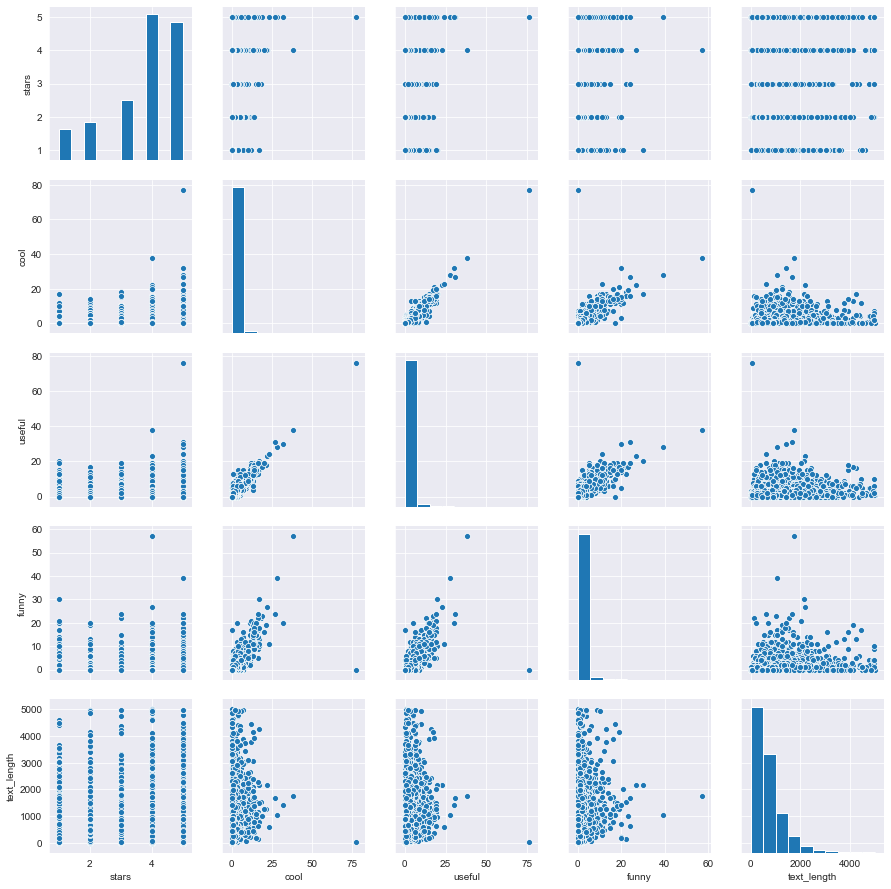

In [12]:
sns.pairplot(data)

In [17]:
data.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


<Figure size 864x288 with 0 Axes>

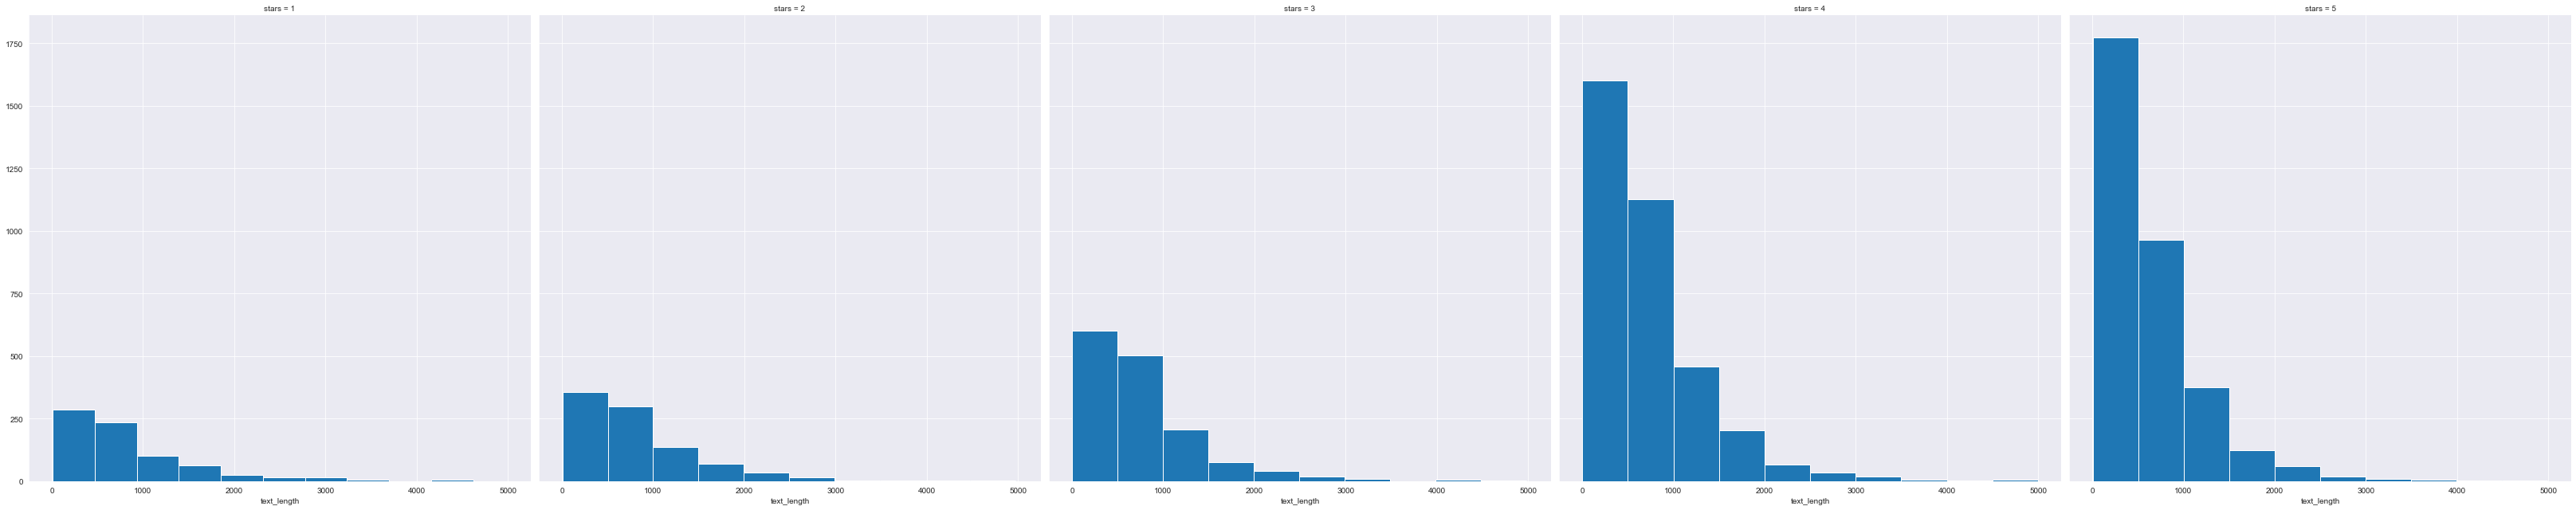

In [36]:
plt.figure(figsize=(12,4))
facet = sns.FacetGrid(data, col='stars', height =9 )
facet.map(plt.hist, 'text_length')

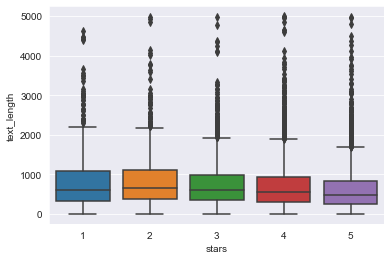

In [39]:
sns.boxplot(y='text_length', x='stars', data=data)

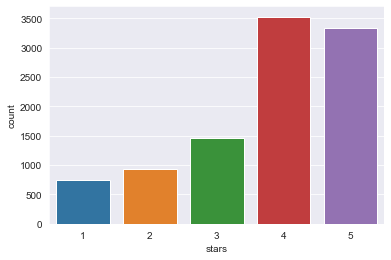

In [48]:
sns.countplot(data['stars'])

In [52]:
g_star=data.groupby(['stars']).mean()
g_star

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [53]:
g_star.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


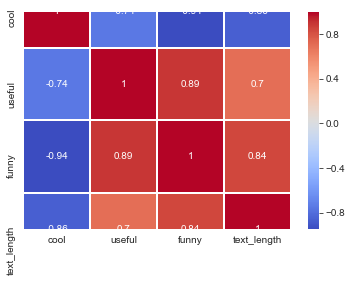

In [60]:
sns.heatmap(g_star.corr(), cmap = 'coolwarm', annot =True,linewidth=1)

# NLP Classification TAsk

In [62]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [84]:
data_class = data[(data['stars']==1) | (data['stars']==5)]

In [86]:
 data_class.apply(len)

business_id    4086
date           4086
review_id      4086
stars          4086
text           4086
type           4086
user_id        4086
cool           4086
useful         4086
funny          4086
text_length    4086
dtype: int64

In [127]:
x = data_class['text']
x.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object

In [134]:
y = data_class['stars']
len(y)
#len(data)

4086

In [135]:
from sklearn.feature_extraction.text import CountVectorizer

In [136]:
transformer = CountVectorizer()

In [137]:
transformer.fit(x)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [139]:
#testing

msg2 = x[3]
msg2

"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.\n\nThe Scottsdale Park and Rec Dept. does a wonderful job of keeping the park clean and shaded.  You can find trash cans and poopy-pick up mitts located all over the park and paths.\n\nThe fenced in area is huge to let the dogs run, play, and sniff!"

In [140]:
msg2_trans=transformer.transform([msg2])
msg2_trans

<1x19183 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [141]:
#print(msg2_trans)

In [142]:
transformer.get_feature_names()[1453]

'avoidance'

# transforming the entire messages 

In [143]:
x2=transformer.transform(x)
x2

<4086x19183 sparse matrix of type '<class 'numpy.int64'>'
	with 317288 stored elements in Compressed Sparse Row format>

# Train test split


In [144]:
from sklearn.model_selection import train_test_split

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.2)

# Training a MOdel

<3268x19183 sparse matrix of type '<class 'numpy.int64'>'
	with 253644 stored elements in Compressed Sparse Row format>

In [146]:
from sklearn.naive_bayes import MultinomialNB

In [147]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [148]:
model.score(x_test,y_test)

0.8960880195599022

In [149]:
predictions = model.predict(x_test)

In [150]:
from sklearn.metrics import classification_report, confusion_matrix

In [151]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.74      0.62      0.67       142
           5       0.92      0.95      0.94       676

    accuracy                           0.90       818
   macro avg       0.83      0.79      0.81       818
weighted avg       0.89      0.90      0.89       818



In [152]:
print(confusion_matrix(y_test, predictions))

[[ 88  54]
 [ 31 645]]


# using Text Processing

In [153]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
import string
from nltk.corpus import stopwords

In [184]:
# Creating a customize analyzer

def text_process(mess):
    nopunc = [char for char in mess if char not in string.punction]
    
    #joining the stings
    nopunc = ''.join(nopunc)
    
    
    #renoving any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.word('english') ]

In [ ]:
#nltk.download_shell()

In [154]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='text_process')),
    ('tfidf', TfidfTransformer()),
    ('classfier', MultinomialNB() ),
    
])

In [ ]:
#pipeline.fit(x_train, y_train)

# Train and split

In [ ]:
x3 = data_class['text']
y3 = data_class['stars']

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x3,y3,test_size=0.3)

In [ ]:
pipeline.fit(x2_train, y2_train)

In [ ]:
#pipeline.score(x2_test,y2_test)

In [176]:
predictions2 = pipeline.predict(x2_test)

In [180]:
print(classification_report( y2_test,predictions2))

              precision    recall  f1-score   support

           1       1.00      0.00      0.01       241
           5       0.80      1.00      0.89       985

    accuracy                           0.80      1226
   macro avg       0.90      0.50      0.45      1226
weighted avg       0.84      0.80      0.72      1226



In [182]:
print(confusion_matrix(y2_test, predictions2))

[[  1 240]
 [  0 985]]


In [ ]:
3